In [1]:
pip install yfinance matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     -------------------- ----------------- 524.3/949.2 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.4 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/8.1 MB 2.1 MB/s eta 0:00:04

In [2]:
import yfinance as yf

# 設定股票代號和數據的時間範圍
stock_symbol = '0050.tw'
start_date = '2024-01-01'
end_date = '2024-12-31'

# 使用yfinance來獲取股票數據
data = yf.download(stock_symbol, start=start_date, end=end_date)

# 顯示數據的前幾行
print(data.head())

Y:\TEMP\ipykernel_13980\54954246.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker         0050.TW     0050.TW     0050.TW     0050.TW   0050.TW
Date                                                                
2024-01-02  130.708755  131.726136  130.466523  131.387019   5922076
2024-01-03  128.431763  129.739810  128.189530  129.546027  13547475
2024-01-04  128.383316  128.625549  128.189533  128.431766   4567593
2024-01-05  128.044189  128.819337  127.995755  128.431771   3999671
2024-01-08  128.625549  129.449146  128.625549  128.867782   9394720


In [6]:
import yfinance as yf

data = yf.download(
    tickers=["2332.tw"],
    start="2025-01-01",
    end="2025-12-31",
    interval="1d",
    group_by="ticker",
)
# 顯示數據的前幾行
print(data.head())

Y:\TEMP\ipykernel_13980\1962087658.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed

Ticker        2332.TW                                           
Price            Open       High        Low      Close    Volume
Date                                                            
2025-01-02  25.344512  25.493597  23.903352  23.953049  28615608
2025-01-03  24.300915  24.450000  23.456098  23.605183  19033178
2025-01-06  24.102135  24.151829  23.605183  23.803965  11662810
2025-01-07  23.953049  24.400304  23.555489  23.555489  16328068
2025-01-08  23.555488  23.903352  22.611280  23.058537  19547764


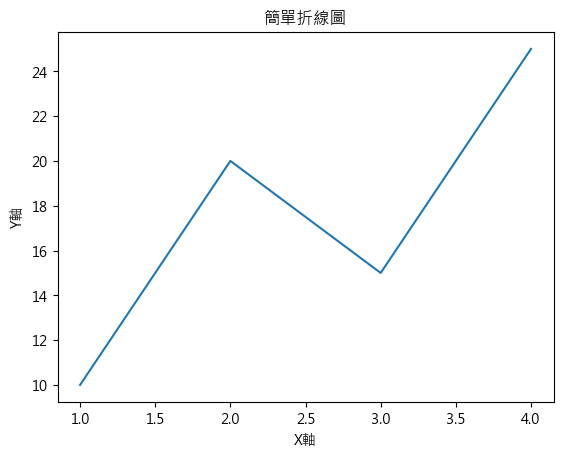

In [4]:
import matplotlib.pyplot as plt
# 修改字體顯示
plt.rcParams['font.family'] = 'Microsoft JhengHei'  

x = [1, 2, 3, 4]
y = [10, 20, 15, 25]

plt.plot(x, y)  # 畫折線圖
plt.title("簡單折線圖")
plt.xlabel("X軸")
plt.ylabel("Y軸")
plt.show()

In [7]:
# 使用matplotlib來繪製收盤價走勢圖
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.title(f'{stock_symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

KeyError: 'Close'

<Figure size 1000x500 with 0 Axes>

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Microsoft JhengHei'  
# 設定股票代號列表
stock_symbols = ['00915.TW', '00878.TW','00940.TW','00939.TW']
start_date = '2024-01-01'
end_date = '2024-12-31'

# 使用yfinance來一次獲取所有指定股票的數據
data = yf.download(stock_symbols, start=start_date, end=end_date)['Close']

# 顯示數據的前幾行
print(data.head())

# 使用matplotlib來繪製所有股票的收盤價走勢圖
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    plt.plot(data[symbol], label=f'{symbol} Close Price')

plt.title('ETF比較',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price (NTD)',fontsize=18)
plt.legend(fontsize=18)
plt.tight_layout()
plt.savefig("ETF.png", bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# 設定股票代號和數據的時間範圍
stock_symbol = '2330.TW'
start_date = '2022-06-01'
end_date = '2025-06-01'

# 使用yfinance來獲取股票數據
data = yf.download(stock_symbol, start=start_date, end=end_date)

# 計算技術指標：移動平均線（MA）
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA60'] = data['Close'].rolling(window=60).mean()
data['MA120'] = data['Close'].rolling(window=120).mean()

# 顯示數據的前幾行
print(data[['Close', 'MA5', 'MA20', 'MA60', 'MA120']].tail())

# 使用matplotlib來繪製股票價格與技術指標的走勢圖
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA5'], label='5-Day MA')
plt.plot(data['MA20'], label='20-Day MA')
plt.plot(data['MA60'], label='60-Day MA')
plt.plot(data['MA120'], label='120-Day MA')
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.legend()
plt.tight_layout()
plt.savefig("2330TW.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# 設定股票代號和數據的時間範圍
stock_symbol = '2330.TW'
start_date = '2022-06-01'
end_date = '2025-06-01'

# 使用yfinance來獲取股票數據
data = yf.download(stock_symbol, start=start_date, end=end_date)

# 計算技術指標：移動平均線（MA）
data['MA5'] = data['Close'].rolling(window=5).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA60'] = data['Close'].rolling(window=60).mean()
data['MA120'] = data['Close'].rolling(window=120).mean()

# 顯示數據的前幾行
print(data[['Close', 'MA20', 'MA120']].tail())

# 使用matplotlib來繪製股票價格與技術指標的走勢圖
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA20'], label='20-Day MA')
plt.plot(data['MA120'], label='120-Day MA')
plt.title(f'{stock_symbol} Stock Price and Moving Averages')
plt.legend()
plt.tight_layout()
plt.savefig("2330TW.png", bbox_inches='tight', dpi=300)
plt.show()